<a href="https://colab.research.google.com/github/powersurge8891/Dimension-Reduction/blob/main/Abalone_Age_Determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data and libraries

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction

/content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('abalone-challenge.csv')
data.head()

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#Exploring data

In [4]:
data.isna().sum()

Sex                   0
Lenght                0
Diameter              0
Height                0
Whole weight          0
Shucked Weight        0
Viscera Weight        0
Shell Weight          0
Rings (+1.5=Years)    0
dtype: int64

In [5]:
data.Sex= pd.get_dummies(data.Sex, drop_first=True)

In [6]:
data.sample(3)

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
1783,0,0.525,0.380,0.125,0.6500,0.303,0.1550,0.159,7
2513,0,0.465,0.350,0.135,0.6265,0.259,0.1445,0.175,8
3884,1,0.290,0.225,0.075,0.1520,0.071,0.0590,0.045,9


###correlation matrix

In [7]:
import seaborn as sns

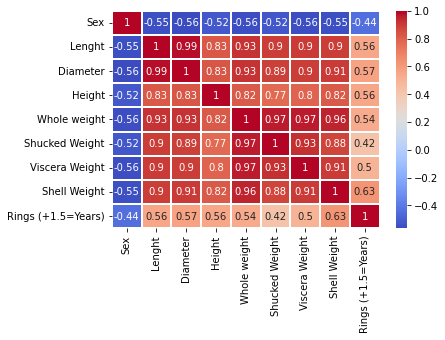

In [8]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linewidths=1)

#Principal Component Analysis

In [9]:
X= data.drop(columns='Rings (+1.5=Years)')
X.head(2)

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07


#Standardizing dataset


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_scaled= scaler.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
X_scaled.head(2)

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261


In [12]:
model= PCA(random_state=354).fit(X_scaled)

Text(0, 0.5, 'Explained variance (Cummulative)')

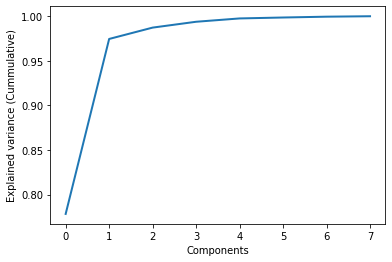

In [16]:
#examining the right amount of components to use
plt.plot(np.cumsum(model.explained_variance_ratio_), linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained variance (Cummulative)')

In [17]:
pca_model= PCA(n_components=2, random_state=5083).fit(X_scaled)

In [18]:
pca_model.components_

array([[ 0.82842753, -0.23668106, -0.24616587, -0.04887343, -0.25699835,
        -0.21052879, -0.2107682 , -0.19977462],
       [ 0.559892  ,  0.34977318,  0.351627  ,  0.06390731,  0.38447729,
         0.33212315,  0.3054774 ,  0.29156298]])

In [22]:
interpretation=pd.DataFrame(pca_model.components_, columns=X.columns)
interpretation

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.828428,-0.236681,-0.246166,-0.048873,-0.256998,-0.210529,-0.210768,-0.199775
1,0.559892,0.349773,0.351627,0.063907,0.384477,0.332123,0.305477,0.291563


In [23]:
components= pca_model.transform(X_scaled)
components

array([[-0.1369122 , -0.37115739],
       [ 0.01271211, -0.59173082],
       [-0.2279358 , -0.23787663],
       ...,
       [-0.41963738,  0.0468987 ],
       [-0.41300934,  0.03749998],
       [-0.67918828,  0.43473187]])

In [30]:
final_comp=pd.DataFrame(components, columns=['none_typical', 'typical'])
final_comp.tail(3)

,none_typical,typical
4174,-0.419637,0.046899
4175,-0.413009,0.037500
4176,-0.679188,0.434732


In [34]:
final_data= pd.concat([final_comp, data], axis=1)
final_data.sample(3)

,none_typical,typical,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
1398,-0.527082,0.208529,0,0.645,0.525,0.160,1.5075,0.7455,0.2450,0.4325,11
3009,0.948096,-0.188873,1,0.255,0.185,0.065,0.0740,0.0305,0.0165,0.0200,4
3711,-0.567897,0.265831,0,0.705,0.550,0.210,1.4385,0.6550,0.3255,0.4620,11
